## Ejercicio Solicitado por el Proyecto.
---

Estructura del codigo:

In [10]:
#Librerias a emplear:

import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# load the .env file variables
load_dotenv()



True

In [ ]:
# Credenciales de la API Spotify API
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret= client_secret)
spotify = spotipy.Spotify(auth_manager= auth_manager)

#Seleccion de Artista
BL = 'spotify:artist:7a0XAaPaK2aDSqa8p3QnC7?'

#Top de Canciones del Artista
top10 = spotify.artist_top_tracks(BL)

#Creacion de Listas para DF
rolazos = []
fama = []
duracion = []

for pista in top10['pistas'][0:10]:
    rolazos.append(pista['name'])
    fama.append(pista['popularity'])
    duracion.append(pista['duration_ms'])

#Creacion de la Data como Diccionario
data = {
    "Canciones": rolazos,
    "Popularidad": fama,
    "Duracion": duracion
}

#DataFrame de Pandas
df = pd.DataFrame(data)
df

## Inconveniente al crear la App en Spotify. 
---

Dado que al momento de generar las credenciales para la conexion de la API desde mi cuenta, spotify se encontraba realizando cambios a la plataforma, se opto por conectarse al siguiente Dataset 'Wine Quality'de UCI para completar el Paso 7 del proyecto. Se adjunta la evidencia:

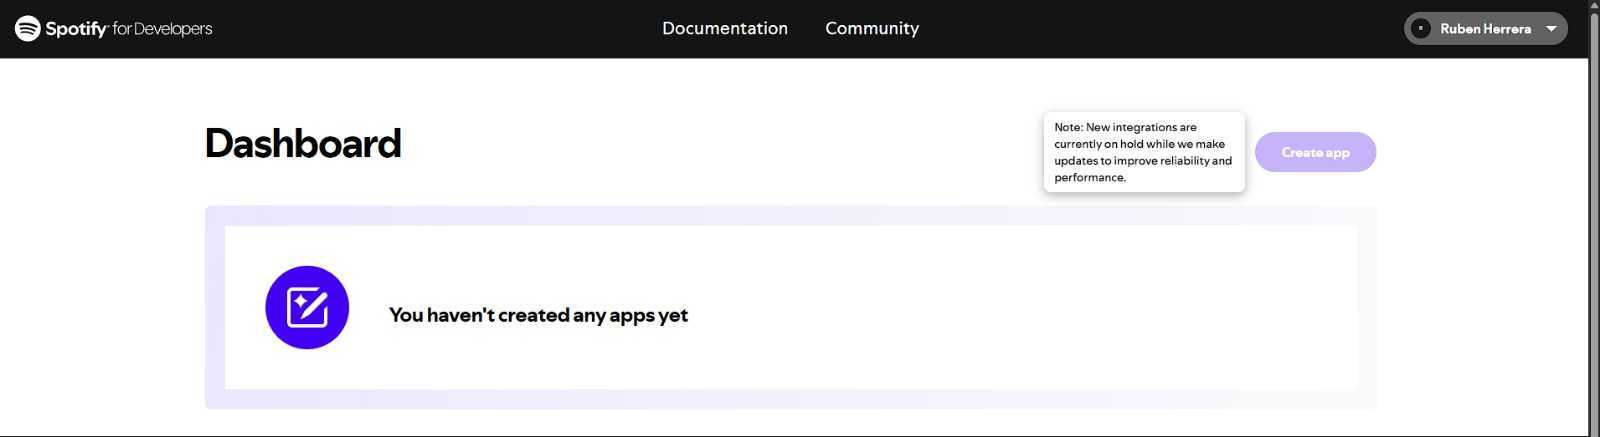

In [ ]:
from ucimlrepo import fetch_ucirepo

#Busqueda del Repo en UCI
WineQ = fetch_ucirepo(id=186)

#Creacion del DataFrame
WineDF = WineQ.data.features

WineDF.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


Realizando la analogia del Paso 7, se analizara la correlacion de dos variables: alcohol y pH para determinar si a mayor cantidad de alcohol, mayor es la acidez del vino.

La correlacion entre el grado de alcohol y la acidez del vino es: 0.12124846709464611


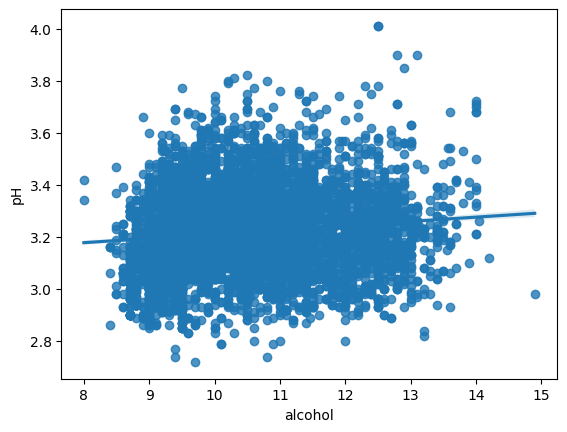

In [9]:
#Importamos librerias
import seaborn as sns
import numpy as np
import pandas as pd

#Determinamos la correlacion mediante un scatter plot
sns.regplot(data=WineDF,x=WineDF['alcohol'], y=WineDF['pH'])

cr = WineDF['alcohol'].corr(WineDF['pH'])
print(f'La correlacion entre el grado de alcohol y la acidez del vino es:', cr)

## Conclusion
---

Tal y como se aprecia en el diagrama de dispersion, no existe una relacion lineal definida entre el grado de alcohol y la acidez del vino, siendo debil la correlacion entre ambas variables. 